# COVID-19 Analysis

## Importing libraries and dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# source : https://ourworldindata.org/coronavirus-source-data

In [2]:
df = pd.read_csv('COVID_Total_Updated.csv')
df.columns

Index(['date', 'World', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican',
       'Venezuela', 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=211)

In [0]:
df = df[['date', 'World', 'India']]
df = df.loc[df['India']!=0]

In [4]:
df = df.set_index([pd.Index(list(i for i in range(0,len(df))))])
df['index1'] = df.index
cols = list(df.columns)
dataset = df[[cols[-1]] + cols[:-1]]
dataset

,index1,date,World,India
0,0,30-01-2020,7823,1
1,1,31-01-2020,9826,1
2,2,01-02-2020,11946,1
3,3,02-02-2020,14554,2
4,4,03-02-2020,17372,2
...,...,...,...,...
101,101,10-05-2020,3989894,62939
102,102,11-05-2020,4066883,67152
103,103,12-05-2020,4137915,70756
104,104,13-05-2020,4223701,74281


In [0]:
X = dataset.iloc[:-7, 0:1].values
y = dataset.iloc[:-7, -1].values
y_actual = dataset.iloc[-7:, -1].values

## Training with data

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pf = PolynomialFeatures(degree = 4)
X_poly = pf.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions for next 7 days

In [0]:
# making new dataset for next 7 days
X_new = np.linspace(99, 105, num = 7, dtype = np.int32, endpoint = True)
X_new = X_new.reshape(len(X_new), 1)
X_total = np.linspace(0, 105, dtype = np.int32, endpoint = True)
X_total = X_total.reshape(len(X_total), 1)

NOTE : The data is from 1st Jan 2020 to 7th May 2020.
With 1st Jan 2020 being 'Day 0'.
An additional dataset is created of next 7 days (ie 8th May 2020 to 14 May 2020) ranging from Day 99 to Day 105.
A bar graph is also plotted for the predicted values.


In [8]:
y_pred = regressor.predict(pf.transform(X_new))
np.set_printoptions(precision=0)
y_pred

array([54845., 58012., 61310., 64744., 68316., 72030., 75890.])

## Results

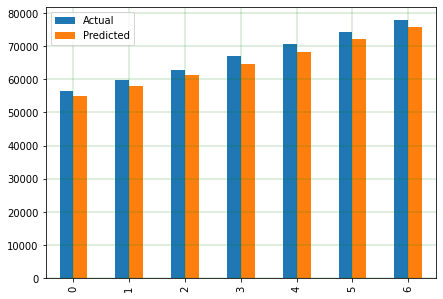

In [9]:
df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred})
df.plot(kind='bar',figsize=(7,5))
plt.grid(which='major', linestyle='-', linewidth='0.25', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='black')
plt.show()

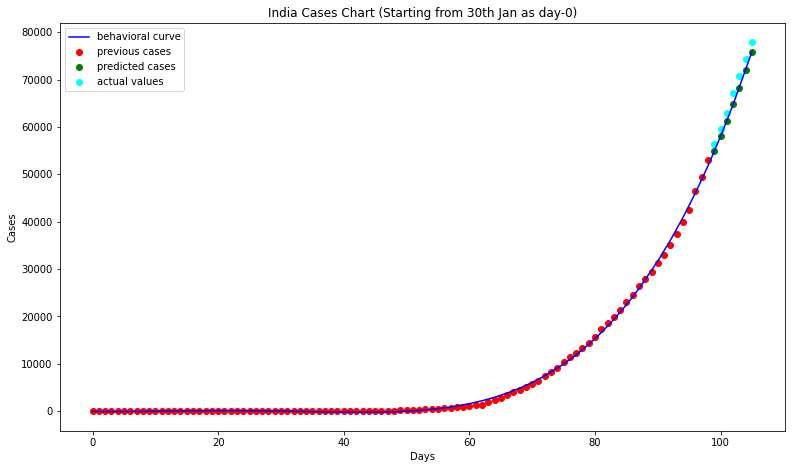

In [10]:
plt.figure(figsize=(13, 7.5))
plt.scatter(X, y, color = 'red', label = 'previous cases')
plt.scatter(X_new, y_pred, color = 'green', label = 'predicted cases')
plt.scatter(X_new, y_actual, color = 'cyan', label = 'actual values')
plt.plot(X_total, regressor.predict(pf.transform(X_total)), color = 'blue', label = 'behavioral curve')
plt.title("India Cases Chart (Starting from 30th Jan as day-0)")
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import r2_score
r2_score(y_actual, y_pred)

0.9223171715304528